In [1]:
from torchvision import models
import torch
 
alexnet = models.alexnet(pretrained=True)

print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

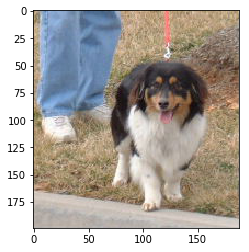

In [3]:
from torchvision import transforms
transform = transforms.Compose([            
 transforms.Resize(256),              
 transforms.ToTensor(),                  
 transforms.Normalize(                    
 mean=[0, 0, 0],               
 std=[.5, .5,.5]                
 )])

from PIL import Image
img = Image.open("dog.jpg")

import matplotlib.pyplot as plt
plt.imshow(img)

In [5]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

alexnet.eval()

out = alexnet(batch_t)
print(out.shape)

with open('/home/rubens/Documents/Python/imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

torch.Size([1, 1000])


Pekinese, Pekingese, Peke 29.70792007446289


[('Pekinese, Pekingese, Peke', 29.70792007446289),
 ('Japanese spaniel', 11.268814086914062),
 ('Tibetan mastiff', 7.142150402069092),
 ('Sussex spaniel', 6.141302585601807),
 ('Welsh springer spaniel', 4.700555801391602)]

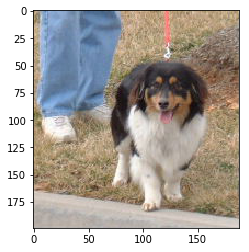

In [7]:
import torch
import numpy as np
onde=np.where(percentage==torch.max(percentage))[0][0]
 
print(classes[onde], percentage[onde].item())

plt.imshow(img)

_, indices = torch.sort(out, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]
